In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#importing train data
data=pd.read_excel(r'C:\Users\Joshua\Downloads\train1.xlsx')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#To check missing values
print(data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
train= data.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(train)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    0        1          3        0     1933        0     0   
1      40576   31   11        1          1        0        3        0     0   
2      15320   27    7        1          1        0      891        1     0   
3      43962   57    4        0          2        0     3287        0     0   
4      29842   31    9        1          1        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29    4        2          2        0        0        1     0   
31643  40178   53    4        0          2        0      380        0     1   
31644  19710   32    4        2          2        0      312        0     0   
31645  38556   57    9        1          1        0      225        1     0   
31646  14156   55    4        0          1        0      204        1     0   

       contact  day  month  duration  campaign  pda

In [5]:
# random forest classifier confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


train=pd.DataFrame(train)
# Define the independent variables (features) and the dependent variable (target)
x = train.drop('subscribed', axis=1)
y= train['subscribed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x=sc.transform(x)

import pandas as pd

# Assuming you have the original column names
column_names = ['ID', 'age', 'job', 'marital', 'education', 'default', 
                'balance', 'housing', 'loan', 'contact', 'day', 
                'month', 'duration', 'campaign', 'pdays', 
                'previous', 'poutcome']

# Convert x to a DataFrame
x_df = pd.DataFrame(x, columns=column_names)


# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.9097946287519747
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.63      0.52      0.57       731

    accuracy                           0.91      6330
   macro avg       0.79      0.74      0.76      6330
weighted avg       0.90      0.91      0.91      6330



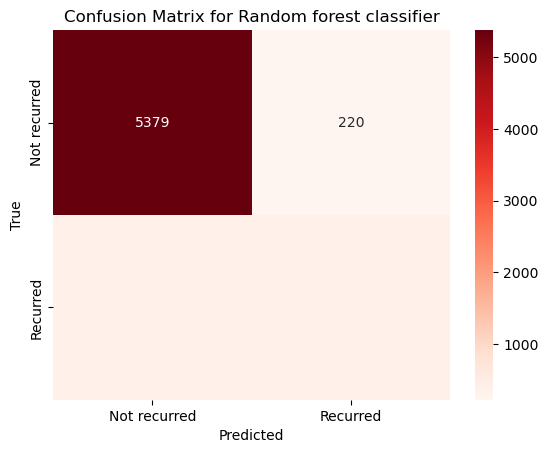

In [6]:
#random forest confuson matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',xticklabels=['Not recurred', 'Recurred'],
            yticklabels=['Not recurred', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random forest classifier')
plt.show()

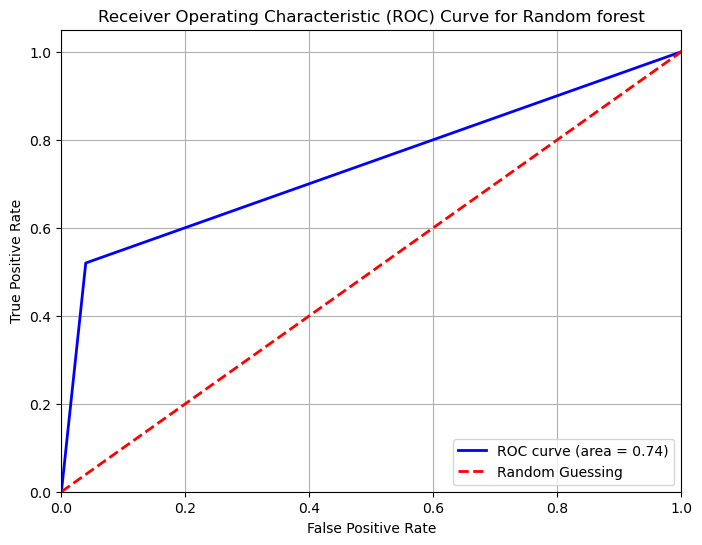

In [7]:
# Plotting ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

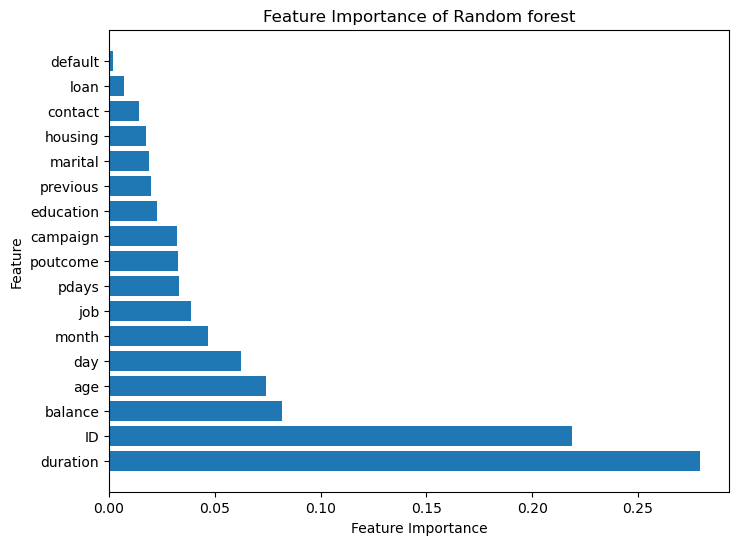

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Getting feature importances from the trained classifier
feature_importances =rf_classifier.feature_importances_

# Get the feature names from the decision tree classifier
feature_names = rf_classifier.feature_names_in_

# Select top N features
N = 17  # You can adjust this number as needed
top_N_features = np.argsort(feature_importances)[::-1][:N]

# Get the top N feature names
top_N_feature_names = [feature_names[i] for i in top_N_features]

# Visualizing feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(N), feature_importances[top_N_features], align='center')
plt.yticks(range(N), top_N_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random forest')
plt.show()

In [9]:
# Interaction terms
train['duration_balance'] = train['duration'] * train['balance']
train['job_education'] = train['job'] * train['education']


# Aggregated statistics
train['age_mean_duration'] = train.groupby('education')['duration'].transform('mean')
train


,ID,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,subscribed,duration_balance,job_education,age_mean_duration
0,26110,56,0,1,3,0,1933,0,0,1,...,9,44,2,-1,0,3,0,85052,0,255.047184
1,40576,31,11,1,1,0,3,0,0,0,...,5,91,2,-1,0,3,0,273,11,258.098126
2,15320,27,7,1,1,0,891,1,0,0,...,5,240,1,-1,0,3,0,213840,7,258.098126
3,43962,57,4,0,2,0,3287,0,0,0,...,6,867,1,84,3,2,1,2849829,8,260.035695
4,29842,31,9,1,1,0,119,1,0,0,...,3,380,1,-1,0,3,0,45220,9,258.098126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,...,8,116,2,-1,0,3,0,0,8,260.035695
31643,40178,53,4,0,2,0,380,0,1,0,...,6,438,2,-1,0,3,1,166440,8,260.035695
31644,19710,32,4,2,2,0,312,0,0,0,...,1,37,3,-1,0,3,0,11544,8,260.035695
31645,38556,57,9,1,1,0,225,1,0,1,...,8,22,7,337,12,0,0,4950,9,258.098126


In [10]:
# Get the list of column names
column_names = train.columns.tolist()

# Display the column names
print(column_names)

['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed', 'duration_balance', 'job_education', 'age_mean_duration']


In [11]:
# random forest classifier confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


train=pd.DataFrame(train)
# Define the independent variables (features) and the dependent variable (target)
x = train.drop('subscribed', axis=1)
y= train['subscribed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x=sc.transform(x)

import pandas as pd

# Assuming you have the original column names
column_names = ['ID', 'age', 'job', 'marital', 'education', 'default', 
                'balance', 'housing', 'loan', 'contact', 'day', 
                'month', 'duration', 'campaign', 'pdays', 
                'previous', 'poutcome','duration_balance', 'job_education', 'age_mean_duration']

# Convert x to a DataFrame
x_df = pd.DataFrame(x, columns=column_names)


# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.9097946287519747
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.65      0.48      0.55       731

    accuracy                           0.91      6330
   macro avg       0.79      0.72      0.75      6330
weighted avg       0.90      0.91      0.90      6330



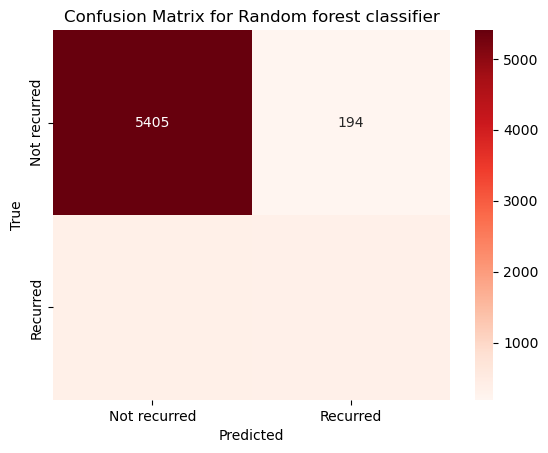

In [12]:
#random forest confuson matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',xticklabels=['Not recurred', 'Recurred'],
            yticklabels=['Not recurred', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random forest classifier')
plt.show()

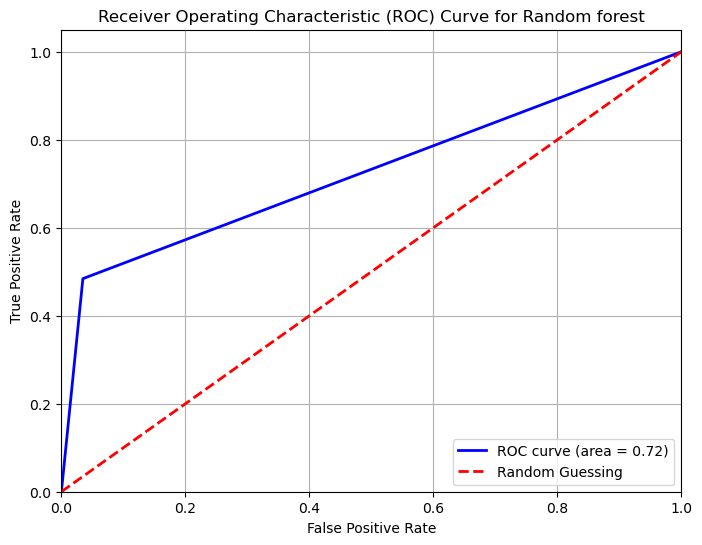

In [13]:
# Plotting ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],   # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used
}


In [15]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)


In [16]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_distributions, 
                                   n_iter=100,      # Number of parameter settings sampled
                                   cv=3,            # 3-fold cross-validation
                                   verbose=2,       # Verbosity
                                   random_state=42, # Ensures reproducibility
                                   n_jobs=-1)       # Use all available cores


In [17]:
# Assuming you have features `X_train` and target `y_train`
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [21]:
# Get the best model
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Accuracy: 0.9097946287519747
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.64      0.50      0.56       731

    accuracy                           0.91      6330
   macro avg       0.79      0.73      0.76      6330
weighted avg       0.90      0.91      0.90      6330



In [23]:
# Define cross-validation strategy
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(best_rf, x, y, cv=cv, scoring='accuracy')  # Use 'accuracy' for classification; 'neg_mean_squared_error' for regression

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.91026856 0.91169036 0.91278243 0.90772634 0.91215042]
Mean cross-validation score: 0.9109


In [25]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# Precision
precision = cross_val_score(best_rf, x, y, cv=cv, scoring='precision')
print(f"Precision scores: {precision}")
print(f"Mean Precision score: {precision.mean():.4f}")

# Recall
recall = cross_val_score(best_rf, x, y, cv=cv, scoring='recall')
print(f"Recall scores: {recall}")
print(f"Mean Recall score: {recall.mean():.4f}")

# F1-Score
f1 = cross_val_score(best_rf, x, y, cv=cv, scoring='f1')
print(f"F1 scores: {f1}")
print(f"Mean F1 score: {f1.mean():.4f}")

Precision scores: [0.6611418  0.67358491 0.68836292 0.63227953 0.66666667]
Mean Precision score: 0.6644
Recall scores: [0.48317631 0.48048452 0.46971736 0.51144011 0.50336474]
Mean Recall score: 0.4896
F1 scores: [0.55832037 0.56087981 0.5584     0.56547619 0.57361963]
Mean F1 score: 0.5633


In [18]:
#importing test data
data1=pd.read_excel('C:\\Users\\Joshua\\Downloads\\test1.xlsx')
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
test= data1.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(test)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
1      40403   78    5        0          0        0     2787        0     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
4      12527   45    1        0          1        0     -705        0     1   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   
13563  34839   29    0        1          1        0        2        1     0   

       contact  day  month  duration  campaign  pda

In [20]:
# Interaction terms
test['duration_balance'] = test['duration'] * test['balance']
test['job_education'] = test['job'] * test['education']


# Aggregated statistics
test['age_mean_duration'] = test.groupby('education')['duration'].transform('mean')
test


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,duration_balance,job_education,age_mean_duration
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,2360,7,260.052021
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,1036764,0,257.457660
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,97344,12,254.990750
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,245505,0,257.457660
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,-78255,1,260.052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,6660,8,254.990750
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,360398,0,257.457660
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,38760,0,257.457660
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,96512,0,260.052021


In [27]:
test_pred = best_rf.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
submissions = pd.DataFrame()

In [29]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [30]:
submissions['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int32

In [31]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [32]:
submissions['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [33]:
submissions.to_csv(' Random forest submission file.csv', header=True, index=False)

In [34]:
import numpy as np
import pandas as pd


# Example: Assume `new_clients_df` is your DataFrame with new client data
# new_clients_df = pd.read_csv('new_clients.csv')

# Ensure the new data is preprocessed in the same way as the training data
# Apply any encoding, scaling, etc., here

# Predict the likelihood of subscription
subscription_probabilities_1 = best_rf.predict_proba(test)[:, 1]  # Get probabilities for the positive class (subscribed)

# If you want binary predictions:
subscription_predictions_1= best_rf.predict(test)

In [35]:
# Save the probabilities or predictions
output_prob = pd.DataFrame({'ID': test['ID'], 'Subscription_Likelihood': subscription_probabilities_1})
output_prob.to_csv('subscription_likelihoods_1.csv', index=False)

output_pred = pd.DataFrame({'ID': test['ID'], 'Subscription_Prediction': subscription_predictions_1})
output_pred.to_csv('subscription_predictions_1.csv', index=False)

print("Predictions and likelihoods have been saved.")

Predictions and likelihoods have been saved.


In [36]:
import pandas as pd

# Load the saved CSV files
output_prob = pd.read_csv('subscription_likelihoods_1.csv')
output_pred = pd.read_csv('subscription_predictions_1.csv')

# Display the first few rows of each DataFrame
print("Subscription Likelihoods:")
print(output_prob.head())  # Display the first 5 rows of the likelihoods


Subscription Likelihoods:
      ID  Subscription_Likelihood
0  38441                 0.006944
1  40403                 0.371771
2   3709                 0.210262
3  37422                 0.012055
4  12527                 0.008594


In [37]:
print("\nSubscription Predictions:")
print(output_pred.head())  # Display the first 5 rows of the predictions


Subscription Predictions:
      ID  Subscription_Prediction
0  38441                        0
1  40403                        0
2   3709                        0
3  37422                        0
4  12527                        0
